In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [74]:
df=pd.read_csv("/kaggle/input/marketprediction/MarketPricePrediction.csv")

In [75]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [76]:
df['date']=pd.to_datetime(df['date'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    10227 non-null  object        
 1   month     10227 non-null  object        
 2   year      10227 non-null  int64         
 3   quantity  10227 non-null  int64         
 4   priceMin  10227 non-null  int64         
 5   priceMax  10227 non-null  int64         
 6   priceMod  10227 non-null  int64         
 7   state     10227 non-null  object        
 8   city      10227 non-null  object        
 9   date      10227 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 799.1+ KB


In [78]:
new_df=df[df['date']>="2010-01-01"]

In [79]:
new_df['date'].describe()

count                             4994
mean     2013-03-13 15:25:52.743291904
min                2010-01-01 00:00:00
25%                2011-07-08 18:00:00
50%                2013-04-01 00:00:00
75%                2014-12-01 00:00:00
max                2016-02-01 00:00:00
Name: date, dtype: object

In [80]:
filtered_df=new_df[new_df['market']=="ABOHAR(PB)"]

In [81]:
min_date=filtered_df['date'].min()
max_date=filtered_df['date'].max()
date_range=pd.date_range(start=min_date,end=max_date,freq="MS")
date_range

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
      

In [82]:
filtered_df.set_index("date",drop=True,inplace=True)

In [83]:
missing_date=date_range[~date_range.isin(filtered_df.index)]

In [84]:
date_reindexed=filtered_df.reindex(date_range)
data=date_reindexed.interpolate(method="linear")

In [85]:
data.isna().sum()

market      1
month       1
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       1
city        1
dtype: int64

In [86]:
len(filtered_df.index),len(data.index)

(66, 67)

In [87]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [100]:

import warnings
warnings.filterwarnings("ignore")
markets=df['market'].unique()
cols=["market","date","quantity","priceMin","priceMax","priceMod"]
df_list=[]
for i in markets:
    filtered_df=df[df["market"]==i]
    filtered_df=filtered_df[cols]
    min_date=filtered_df['date'].min()
    max_date=filtered_df['date'].max()
    date_range=pd.date_range(start=min_date,end=max_date,freq="MS")
    filtered_df.set_index("date",drop=True,inplace=True)
    missing_date=date_range[~date_range.isin(filtered_df.index)]
    date_reindexed=filtered_df.reindex(date_range)
    data=date_reindexed.interpolate(method="linear")
    data['market']=data['market'].fillna(data['market'].mode())
    df_list.append(data)

In [101]:
cleaned_df=pd.concat(df_list,axis=0)

In [102]:
cleaned_df['market'].fillna(method="ffill",inplace=True)

In [103]:
cleaned_df['market'].unique()

array(['ABOHAR(PB)', 'AGRA(UP)', 'AHMEDABAD(GUJ)', 'AHMEDNAGAR(MS)',
       'AJMER(RAJ)', 'ALIGARH(UP)', 'ALWAR(RAJ)', 'AMRITSAR(PB)',
       'BALLIA(UP)', 'BANGALORE', 'BAREILLY(UP)', 'BELGAUM(KNT)',
       'BHATINDA(PB)', 'BHAVNAGAR(GUJ)', 'BHOPAL', 'BHUBNESWER(OR)',
       'BIHARSHARIF(BHR)', 'BIJAPUR(KNT)', 'BIKANER(RAJ)', 'BOMBORI(MS)',
       'BURDWAN(WB)', 'CHAKAN(MS)', 'CHALLAKERE(KNT)', 'CHANDIGARH',
       'CHANDVAD(MS)', 'CHENNAI', 'CHICKBALLAPUR(KNT)',
       'COIMBATORE(TN) (bellary)', 'COIMBATORE(TN) (podisu)',
       'DEESA(GUJ)', 'DEHRADOON(UTT)', 'DELHI', 'DEORIA(UP)',
       'DEVALA(MS)', 'DEWAS(MP)', 'DHAVANGERE(KNT)', 'DHULIA(MS)',
       'DINDIGUL(TN)', 'DINDIGUL(TN)(Podis', 'DINDORI(MS)', 'ETAWAH(UP)',
       'GONDAL(GUJ)', 'GORAKHPUR(UP)', 'GUWAHATI', 'HALDWANI(UTT)',
       'HASSAN(KNT)', 'HOSHIARPUR(PB)', 'HUBLI(KNT)', 'HYDERABAD',
       'INDORE(MP)', 'JAIPUR', 'JALANDHAR(PB)', 'JALGAON(MS)',
       'JALGAON(WHITE)', 'JAMMU', 'JAMNAGAR(GUJ)', 'JODHPUR(RAJ)',
 

In [104]:
cleaned_df.head()

,market,quantity,priceMin,priceMax,priceMod
2005-01-01,ABOHAR(PB),2350.0,404.0,493.0,446.0
2005-02-01,ABOHAR(PB),1400.0,286.0,365.0,324.0
2005-03-01,ABOHAR(PB),900.0,281.0,357.0,322.0
2005-04-01,ABOHAR(PB),637.5,335.5,453.5,398.5
2005-05-01,ABOHAR(PB),375.0,390.0,550.0,475.0


In [109]:
market_df=cleaned_df[cleaned_df['market']=='SATANA(MS)']

<Axes: >

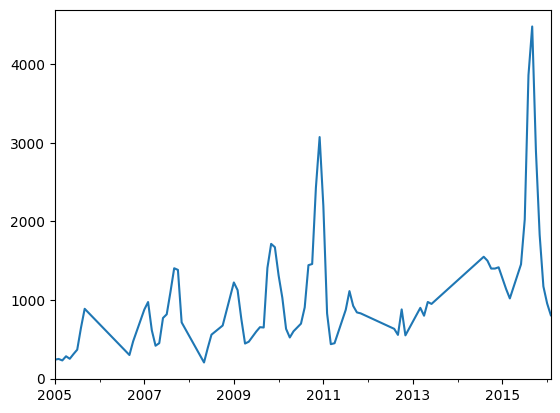

In [110]:
market_df['priceMod'].plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf